# LAB02: Decision Tree with scikit-learn

## add the overview about the lab (description, source, ...)

### add description about task 1

In [56]:
# those below libraries are neccessary for lab work
import pandas as pd
from sklearn.model_selection import train_test_split


# we needs to prepare 2 .data file before working with .csv file.
# read_csv is a method to read .csv, .data,... file, it returns data as DataFrame (which is popular in pandas)

# prepare training set
train_data = pd.read_csv('poker-hand-training-true.data', header=None)

# prepare test set
test_data = pd.read_csv('poker-hand-testing.data', header = None)

# merge 2 file in to 1.
merged_data = pd.concat([train_data, test_data], ignore_index=True)

# save the merged data as .csv file.
merged_data.to_csv('poker-hand-data.csv', index=False)


datasets = pd.read_csv('poker-hand-data.csv')
datasets = datasets.to_numpy()
label = datasets[:, -1]
datasets = datasets[:, :-1]
# Prepare the size.
train_sizes = [0.4, 0.6, 0.8, 0.9]
test_sizes = [0.6, 0.4, 0.2, 0.1]

for train_size, test_size in zip(train_sizes, test_sizes):
    feature_train, feature_test, label_train, label_test = train_test_split(datasets, label, train_size=train_size, test_size=test_size, 
                                                                            stratify=label, shuffle=True, random_state=0)
    subsets.append((feature_train, feature_test, label_train, label_test))
    print(f"Train size: {train_size}, Test size: {test_size}")
    print(f"Train set size: {len(feature_train)}, Test set size: {len(feature_test)}")




Train size: 0.4, Test size: 0.6
Train set size: 410004, Test set size: 615006
Train size: 0.6, Test size: 0.4
Train set size: 615006, Test set size: 410004
Train size: 0.8, Test size: 0.2
Train set size: 820008, Test set size: 205002
Train size: 0.9, Test size: 0.1
Train set size: 922509, Test set size: 102501


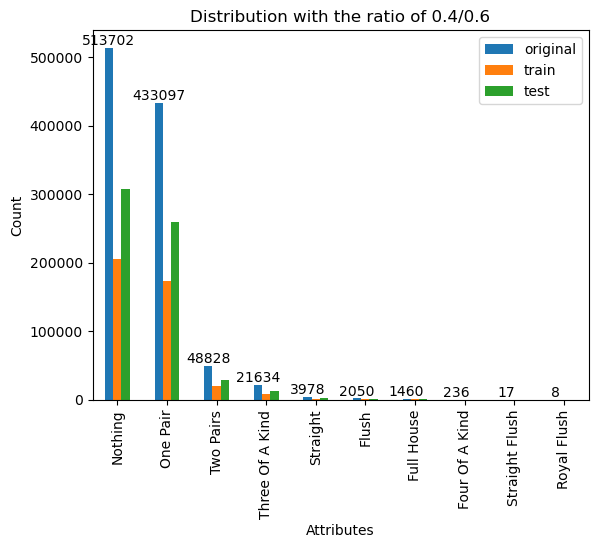

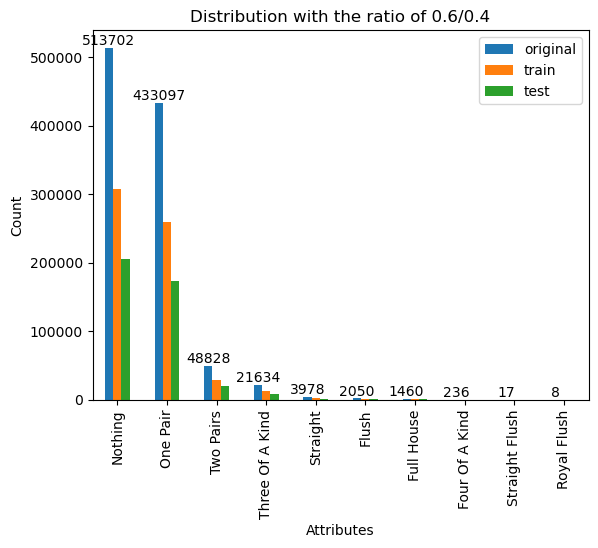

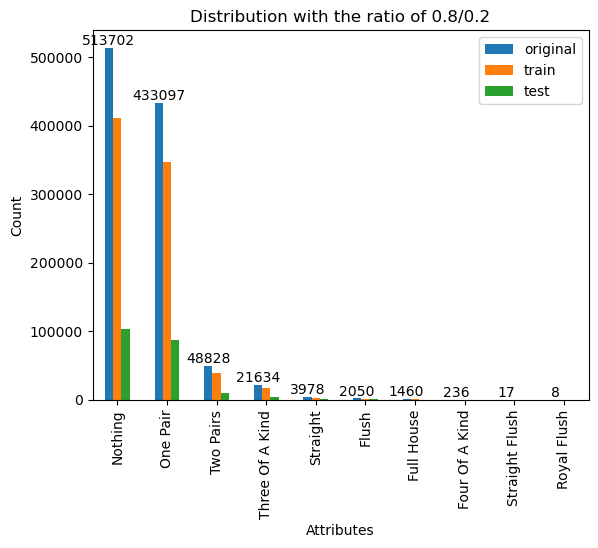

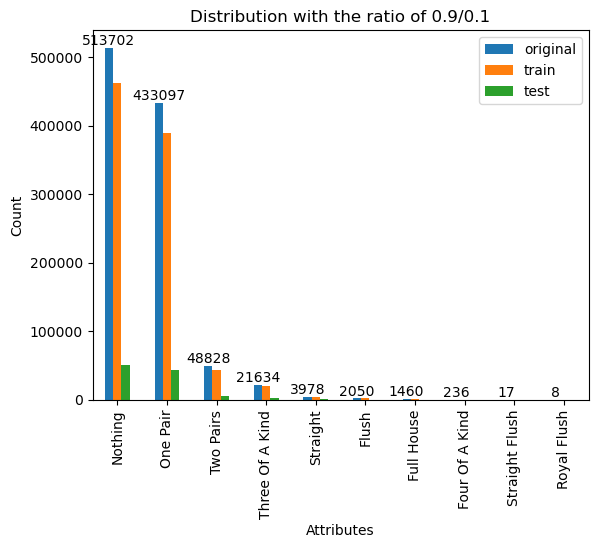

In [57]:
import matplotlib.pyplot as plt
attributes= ["Nothing", "One Pair", "Two Pairs", "Three Of A Kind", "Straight", "Flush", "Full House", "Four Of A Kind", "Straight Flush", "Royal Flush"]

def visualize_distributions(original, train, test, title):
    total_original_data = pd.DataFrame(original).value_counts()
    total_training_data = pd.DataFrame(train).value_counts()
    total_test_data = pd.DataFrame(test).value_counts()
    df = pd.DataFrame({'original': total_original_data,
                    'train': total_training_data,
                    'test': total_test_data})
    ax = df.plot(kind='bar', xlabel="Attributes", ylabel="Count", title=title)
    ax.set_xticklabels(attributes, rotation='vertical')
    ax.bar_label(ax.containers[0])
    plt.show()
for index, subset in enumerate(subsets):
    if index > 3: 
        break
    feature_train, feature_test, label_train, label_test = subset
    train_size = train_sizes[index]
    test_size = test_sizes[index]
    visualize_distributions(label, label_train, label_test, 'Distribution with the ratio of ' + str(train_size) + '/' + str(test_size))

    

    


### Task 2: add description

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import display
import graphviz

feature_names = ['Suit1','Rank1','Suit2','Rank2','Suit3','Rank3','Suit4','Rank4','Suit5','Rank5']

def build_decision_tree(feature_train, label_train):
    clf = DecisionTreeClassifier(criterion = 'entropy')
    clf.fit(feature_train, label_train)
    dot_data = export_graphviz(clf, out_file=None, class_names=attributes, feature_names=feature_names,
                               filled=True, max_depth=5, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [59]:
!pip install graphviz

0 -> 4 means [feature_train], [feature_test], [label_train], [label_test]

### Decision tree for the ratio of 40/60

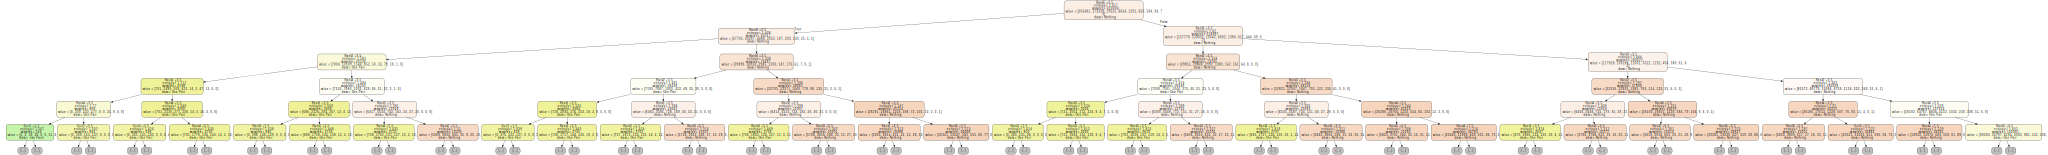

In [81]:
feature_train, feature_test, label_train, label_test = subsets[0]
build_decision_tree(feature_train, label_train)

### Decision tree for the ratio of 60/40

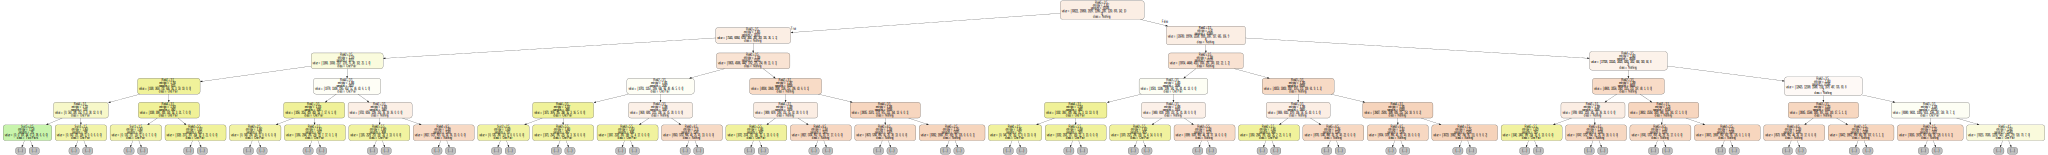

In [83]:
feature_train, feature_test, label_train, label_test = subsets[1]
build_decision_tree(feature_train, label_train)

### Decision tree for the ratio of 80/20

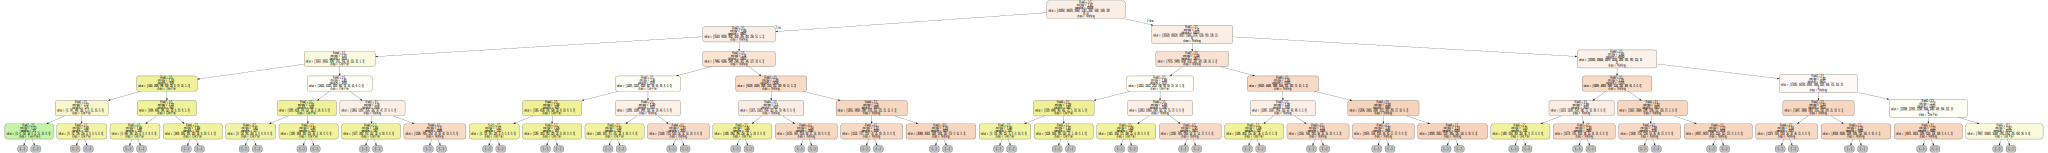

In [84]:
feature_train, feature_test, label_train, label_test = subsets[2]
build_decision_tree(feature_train, label_train)

### Decision tree for the ratio of 90/10

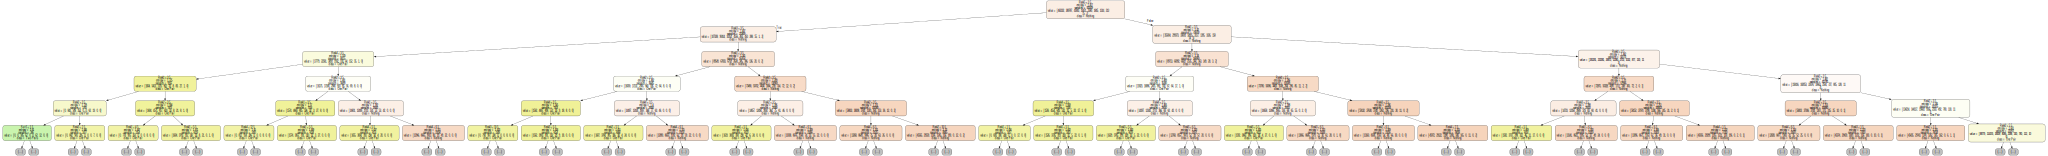

In [86]:
feature_train, feature_test, label_train, label_test = subsets[3]
build_decision_tree(feature_train, label_train)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def get_classification_report(feature_test, label_test, train_size, test_size):
    label_pred = clf.predict(feature_test)
    print("Classification Report for: " + str(train_size) + "/" + str(test_size))
    print(classification_report(label_test, label_pred, target_names=attributes, digits=3))
    print()
    
def draw_confusion_matrix(feature_test, label_test, train_size, test_size):
    label_pred = clf.predict(feature_test)
    cm = confusion_matrix(label_test, label_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for the ratio: ' + str(train_size) + '/' + str(test_size))
    plt.xticks(ticks=range(len(attributes)), labels=attributes, rotation='vertical')
    plt.show()


## Classification Report & Confusion Matrix

### For the ratio of: 40/60

Classification Report for: 40/60
                 precision    recall  f1-score   support

        Nothing      0.708     0.698     0.703    308221
       One Pair      0.579     0.578     0.578    259858
      Two Pairs      0.269     0.290     0.279     29297
Three Of A Kind      0.283     0.313     0.297     12980
       Straight      0.228     0.264     0.245      2387
          Flush      0.054     0.089     0.067      1230
     Full House      0.092     0.112     0.101       876
 Four Of A Kind      0.169     0.190     0.179       142
 Straight Flush      0.000     0.000     0.000        10
    Royal Flush      0.000     0.000     0.000         5

       accuracy                          0.616    615006
      macro avg      0.238     0.253     0.245    615006
   weighted avg      0.619     0.616     0.617    615006




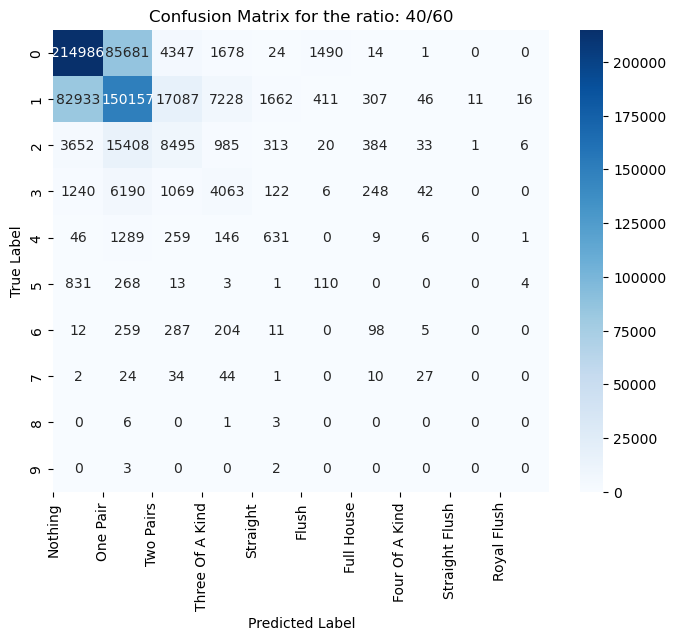

In [99]:
feature_train, feature_test, label_train, label_test = subsets[0]
get_classification_report(feature_test, label_test, 40, 60)
draw_confusion_matrix(feature_test, label_test, 40, 60)

### For the raito of 60/40

Classification Report for: 60/40
                 precision    recall  f1-score   support

        Nothing      0.717     0.727     0.722    205481
       One Pair      0.599     0.578     0.588    173239
      Two Pairs      0.273     0.291     0.282     19531
Three Of A Kind      0.287     0.316     0.301      8654
       Straight      0.229     0.266     0.246      1591
          Flush      0.060     0.093     0.073       820
     Full House      0.095     0.113     0.103       584
 Four Of A Kind      0.168     0.191     0.179        94
 Straight Flush      0.000     0.000     0.000         7
    Royal Flush      0.000     0.000     0.000         3

       accuracy                          0.631    410004
      macro avg      0.243     0.258     0.249    410004
   weighted avg      0.632     0.631     0.631    410004




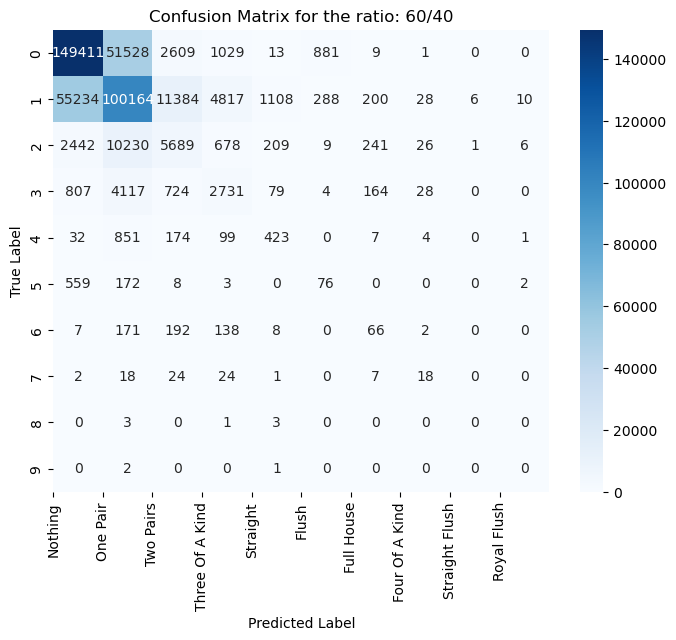

In [100]:
feature_train, feature_test, label_train, label_test = subsets[1]
get_classification_report(feature_test, label_test, 60, 40)
draw_confusion_matrix(feature_test, label_test, 60, 40)

### For the ratio of 80/20

Classification Report for: 80/20
                 precision    recall  f1-score   support

        Nothing      0.709     0.700     0.705    102740
       One Pair      0.582     0.579     0.580     86619
      Two Pairs      0.272     0.293     0.282      9766
Three Of A Kind      0.285     0.323     0.303      4327
       Straight      0.233     0.269     0.250       796
          Flush      0.057     0.098     0.072       410
     Full House      0.092     0.113     0.102       292
 Four Of A Kind      0.180     0.234     0.204        47
 Straight Flush      0.000     0.000     0.000         3
    Royal Flush      0.000     0.000     0.000         2

       accuracy                          0.617    205002
      macro avg      0.241     0.261     0.250    205002
   weighted avg      0.621     0.617     0.619    205002




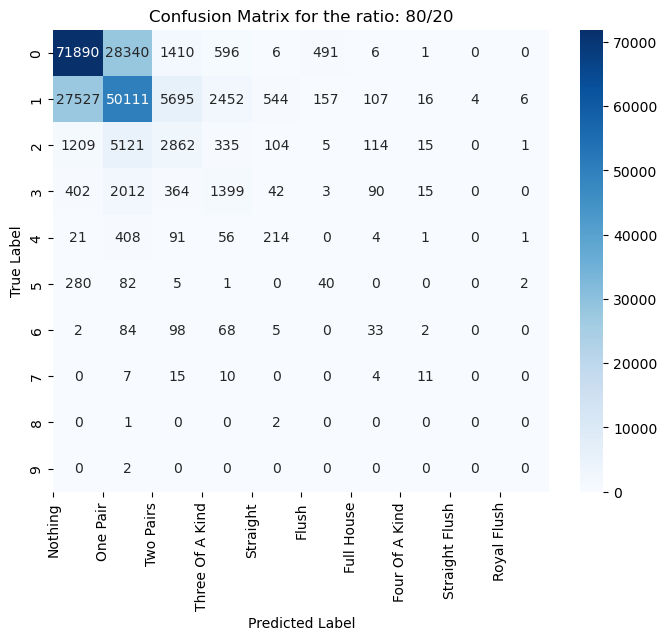

In [101]:
feature_train, feature_test, label_train, label_test = subsets[2]
get_classification_report(feature_test, label_test, 80, 20)
draw_confusion_matrix(feature_test, label_test, 80, 20)

### For the ratio of: 90/10

Classification Report for: 90/10
                 precision    recall  f1-score   support

        Nothing      0.711     0.707     0.709     51370
       One Pair      0.587     0.579     0.583     43310
      Two Pairs      0.269     0.287     0.278      4883
Three Of A Kind      0.286     0.324     0.304      2163
       Straight      0.229     0.256     0.242       398
          Flush      0.070     0.117     0.088       205
     Full House      0.091     0.123     0.105       146
 Four Of A Kind      0.185     0.217     0.200        23
 Straight Flush      0.000     0.000     0.000         2
    Royal Flush      0.000     0.000     0.000         1

       accuracy                          0.621    102501
      macro avg      0.243     0.261     0.251    102501
   weighted avg      0.624     0.621     0.623    102501




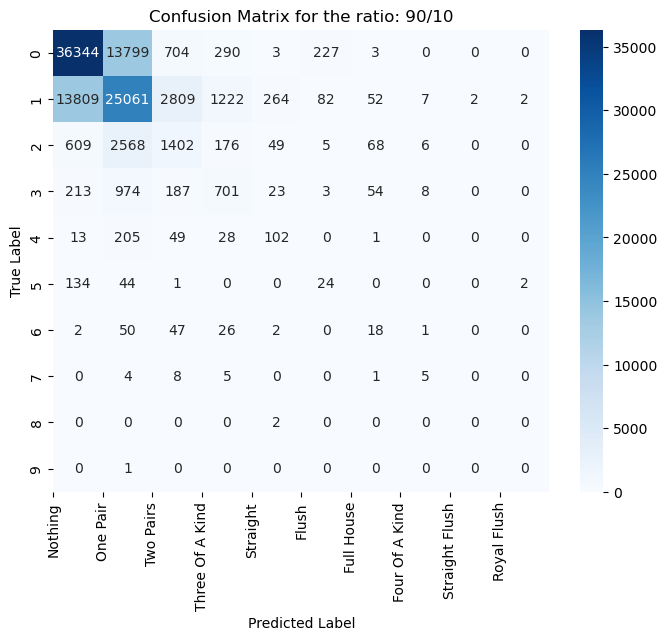

In [102]:
feature_train, feature_test, label_train, label_test = subsets[3]
get_classification_report(feature_test, label_test, 90, 10)
draw_confusion_matrix(feature_test, label_test, 90, 10)

# The depth and accuracy of a decision tree


In [135]:
from sklearn.metrics import accuracy_score

max_depths_values = [None, 2, 3, 5, 6, 7]
results_tab = []
feature_train, feature_test, label_train, label_test = subsets[2]

def draw_decision_tree_with_max_depth(feature_train, label_train, max_depth):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(feature_train, label_train)
    
    label_pred = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, label_pred)
    results_tab.append([max_depth, accuracy])
    
    if max_depth == None:
        max_depth = 10
    dot_data = export_graphviz(clf, out_file=None, class_names=attributes, feature_names=feature_names,
                               filled=True, max_depth=max_depth, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    


    

## max_depth = None

In [136]:
draw_decision_tree_with_max_depth(feature_train, label_train, None)

## max_depth = 2

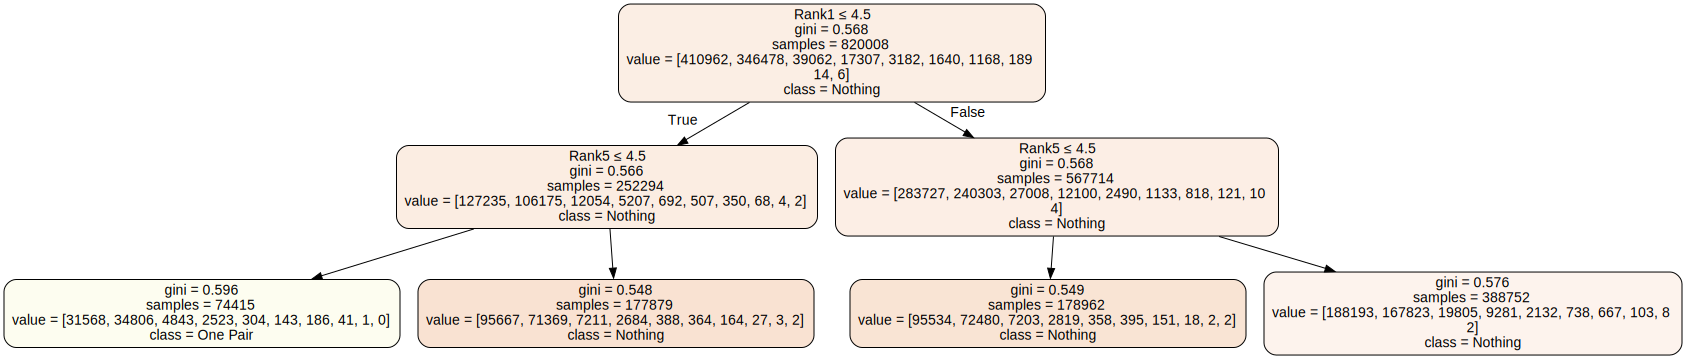

In [137]:
draw_decision_tree_with_max_depth(feature_train, label_train, 2)

## max_depth = 3

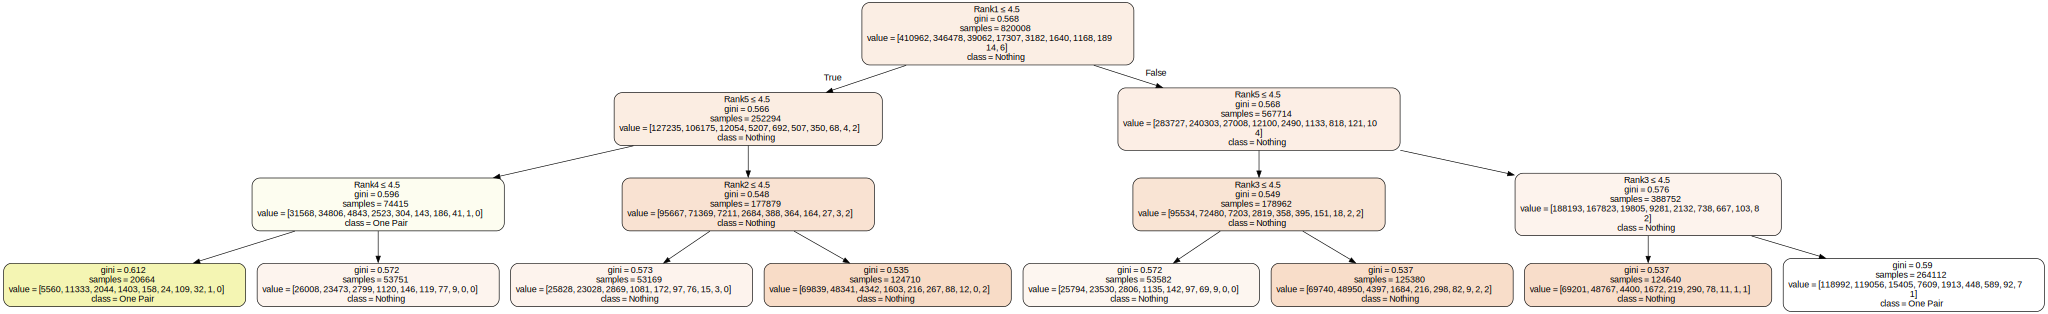

In [138]:
draw_decision_tree_with_max_depth(feature_train, label_train, 3)

## max_depth = 4

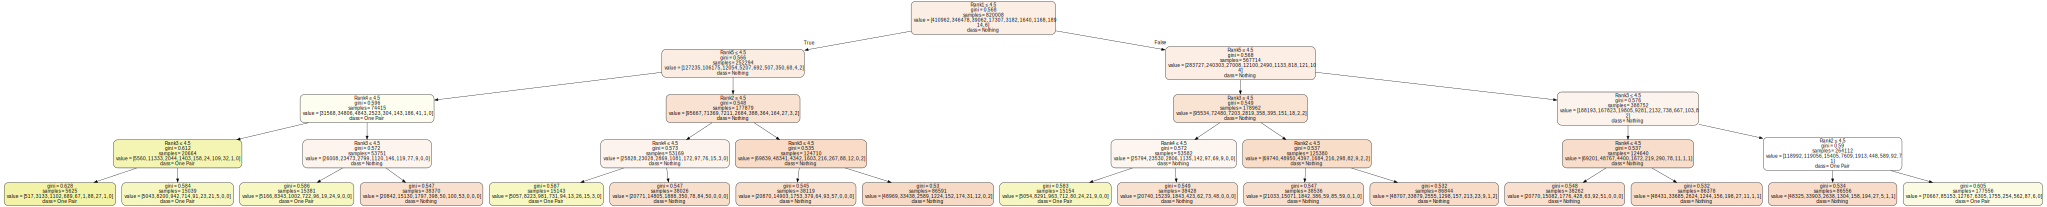

In [139]:
draw_decision_tree_with_max_depth(feature_train, label_train, 4)

## max_depth = 5

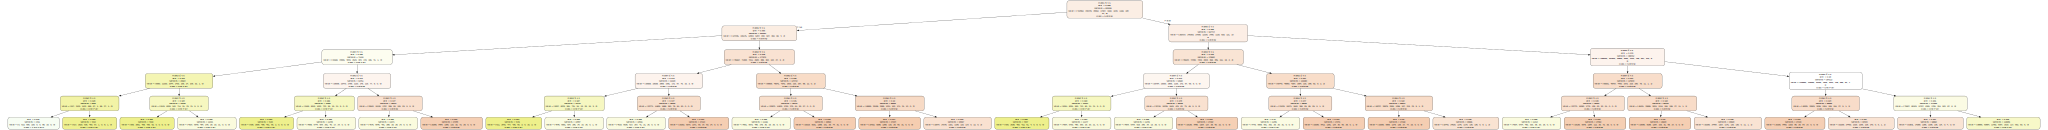

In [140]:
draw_decision_tree_with_max_depth(feature_train, label_train, 5)

## max_depth = 6

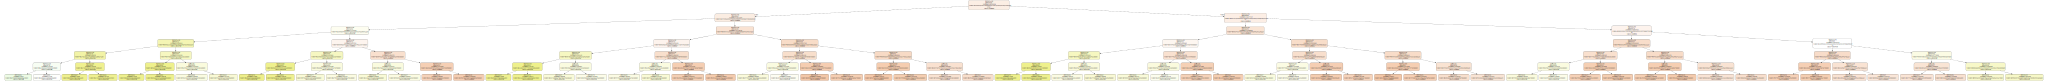

In [141]:
draw_decision_tree_with_max_depth(feature_train, label_train, 6)

## max_depth = 7:

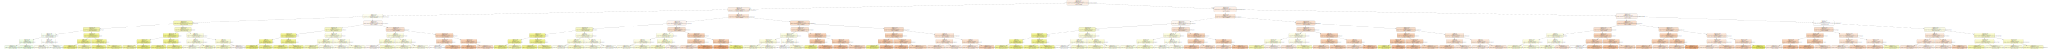

In [142]:
draw_decision_tree_with_max_depth(feature_train, label_train, 7)

## Result table:

In [143]:
results_table = pd.DataFrame(results_tab, columns=['max_depth', 'accuracy_score'])
print(results_table)

   max_depth  accuracy_score
0        NaN        0.637374
1        2.0        0.505522
2        3.0        0.509761
3        4.0        0.537097
4        5.0        0.554458
5        6.0        0.554385
6        7.0        0.558404
